# Santa Clays Golf Championship statistics with Numpy
Playing golf under the midnight sun was one of my favorite things growing up. I competed when I was a junior golfer. One of the iconic players from Rovaniemi is Mika Törmänen who has won the club championship multiple times. My objective is to do some data analysis with Numpy to find out WHY DOES HE WIN SO OFTEN ourely based on old golf championship golf scores.

In [ ]:
# Import the libraries and check the version of Numpy
import numpy as np

print(np.__version__)

1.25.2


In [ ]:
# Santa Claus Golf Par scores to help transform strokes into values relative to par
course = np.array([5, 3, 4, 5, 5, 3, 4, 4, 3, 4, 4, 5, 4, 3, 4, 4, 4, 3])

# Making sure I have 18 holes
count = np.count_nonzero(course)
print(f"Total number of holes is: {count}")

# Making sure that end results equals 71
par = np.sum(course)
print(f"The par score is: {par}")

Total number of holes is: 18
The par score is: 71


What score should I compare Mr. Törmänen scores? I should compare him to the other 4 players of the TOP 5. The difference between 1st and 10th is huge, therefore I want to compare Mr. Törmänen to his closest competitors (other 4 players at the top 5).

It is also easier to practice first with just 5 arrays, because the whole history of Santa Claus Championship has 50 arrays.

In [ ]:
# Golf scores from 2011

tormanen_2011 = np.array([[6, 3,	4,	6,	6,	4,	4,	3,	4,  5,	6,	5,	5,	4,	4,	5,	4,	2],
                          [5,	4,	6,	5,	5,	3,	5,	4,	3,	4,	5,	6,	4,	4,	4,	4,	5,	3],
                          [5,	3,	4,	5,	5,	4,	5,	3,	3,	5,	4,	6,	4,	4,	4,	5,	5,	5]])

ylinenpaa_2011 = np.array([[5,	3,	4,	6,	5,	5,	5,	6,	3,	4,	4,	8,	5,	3,	4,	5,	4,	3],
                           [8,	4,	5,	5,	5,	5,	4,	4,	4,	5,	4,	6,	3,	4,	5,	4,	6,	2],
                           [6,	4,	5,	5,	5,	4,	5,	4,	3,	4,	4,	6,	3,	4,	4,	3,	4,	3]])

kaikkonen_2011 = np.array([[6,	4,	6,	4,	6,	4,	8,	4,	2,	4,	4,	5,	4,	3,	6,	5,	6,	3],
                           [5,	4,	4,	5,	5,	3,	6,	5,	3,	5,	4,	6,	6,	3,	3,	5,	5,	4],
                           [6,	4,	6,	4,	5,	3,	6,	4,	5,	4,	4,	5,	4,	3,	4,	4,	4,	3]])

tervonen_2011 = np.array([[5,	4,	4,	5,	6,	3,	4,	4,	2,	4,	6,	5,	5,	4,	4,	5,	4,	4],
                          [5,	4,	5,	5,	5,	4,	6,	8,	3,	3,	4,	5,	5,	4,	4,	3,	5,	4],
                          [6,	4,	4,	5,	6,	3,	5,	4,	3,	4,	5,	7,	6,	5,	4,	6,	4,	3]])

lampinen_2011 = np.array([[6,	4,	6,	4,	5,	4,	5,	4,	3,	4,	5,	6,	4,	3,	5,	6,	6,	4],
                          [7,	3,	6,	5,	5,	3,	5,	4,	3,	4,	6,	6,	7,	4,	4,	4,	4,	3],
                          [7,	4,	5,	6,	5,	4,	4,	4,	3,	5,	4,	7,	5,	4,	4,	5,	5,	2]])

# Dictionary for player names and total strokes
players_dict = {
    'Mika Törmänen': np.sum(tormanen_2011),
    'Hannu Ylinenpää': np.sum(ylinenpaa_2011),
    'Tomi Kaikkonen': np.sum(kaikkonen_2011),
    'Joonas Tervonen': np.sum(tervonen_2011),
    'Jaakko Lampinen': np.sum(lampinen_2011),
}

# Sorting the dictionary based on summed values
sorted_players = dict(sorted(players_dict.items(), key=lambda item: item[1], reverse=False))

# Displaying the result
print("Final score for 2011 Championships")
for player, total in sorted_players.items():
    print(f"{player}: {total} (+{(total - 213)})")

Final score for 2011 Championships
Mika Törmänen: 238 (+25)
Hannu Ylinenpää: 241 (+28)
Tomi Kaikkonen: 243 (+30)
Joonas Tervonen: 244 (+31)
Jaakko Lampinen: 250 (+37)


In [ ]:
# Next I want to calculate the average score per hole for Mika Törmänen

# Calculate average score for each hole
tormanen_2011_avg = np.average(tormanen_2011 - course, axis=0)

# Round the average scores
rounded_tormanen_2011_avg = np.round(tormanen_2011_avg, decimals=2)
tormanen_avg = np.average(rounded_tormanen_2011_avg)

print(rounded_tormanen_2011_avg)
print(f"Total average {tormanen_avg }")

[ 0.33  0.33  0.67  0.33  0.33  0.67  0.67 -0.67  0.33  0.67  1.    0.67
  0.33  1.    0.    0.67  0.67  0.33]
Total average 0.4627777777777778


In [ ]:
# Next I want to calculate the avg score per hole for the other top 4 players.

# Step 1: Combine four arrays into a single one
rounds_2011 = np.concatenate([ylinenpaa_2011, kaikkonen_2011, tervonen_2011, lampinen_2011])

# Step 2: Calculate the average from the scores relative to par (score -  course par)
others_2011_avg = np.average(rounds_2011 - course, axis=0)

# Step 3: Round the scores and calculate the average
rounded_others_2011_avg = np.round(others_2011_avg, decimals=2)
total_avg = np.average(rounded_others_2011_avg)

print(rounded_others_2011_avg)
print(f"Total average {total_avg}")


[ 1.    0.83  1.   -0.08  0.25  0.75  1.25  0.58  0.08  0.17  0.5   1.
  0.75  0.67  0.25  0.58  0.75  0.17]
Total average 0.5833333333333334


Next is time to compare how Mr. Törmänen compares to other four of his competitors!

In [ ]:
comparison_2011 = rounded_tormanen_2011_avg - rounded_others_2011_avg
print(comparison_2011)

[-0.67 -0.5  -0.33  0.41  0.08 -0.08 -0.58 -1.25  0.25  0.5   0.5  -0.33
 -0.42  0.33 -0.25  0.09 -0.08  0.16]


In [ ]:
# Time to analyze the results!

# Count the score difference Törmänen vs others
difference = total_avg - tormanen_avg
total_strokes = 54 * difference
print(f"Difference in strokes for a 54 hole competition: {total_strokes}")

# Count how many holes Mr. Törmänen was better than his competitors
tormanen_better = np.count_nonzero(comparison_2011 < 0)
print(f"Törmänen was better than his competitors this many holes: {tormanen_better}")


Difference in strokes for a 54 hole competition: 6.510000000000002
Törmänen was better than his competitors this many holes: 10


Where is the difference being made?


1.   Mr. Törmänen scores apprixmately +0.46 per hole vs others +0.58 per hole. This means 6.5 strokes during 54-hole tournament.
2.   Mr. Törmänen was better than his competitors on 10/18 holes.
3. Mr. Törmänen dominated on the 1st, 2nd, 7th and 8th hole.
4. Mr. Törmänen struggled on the 10th, 11th and 4th hole.

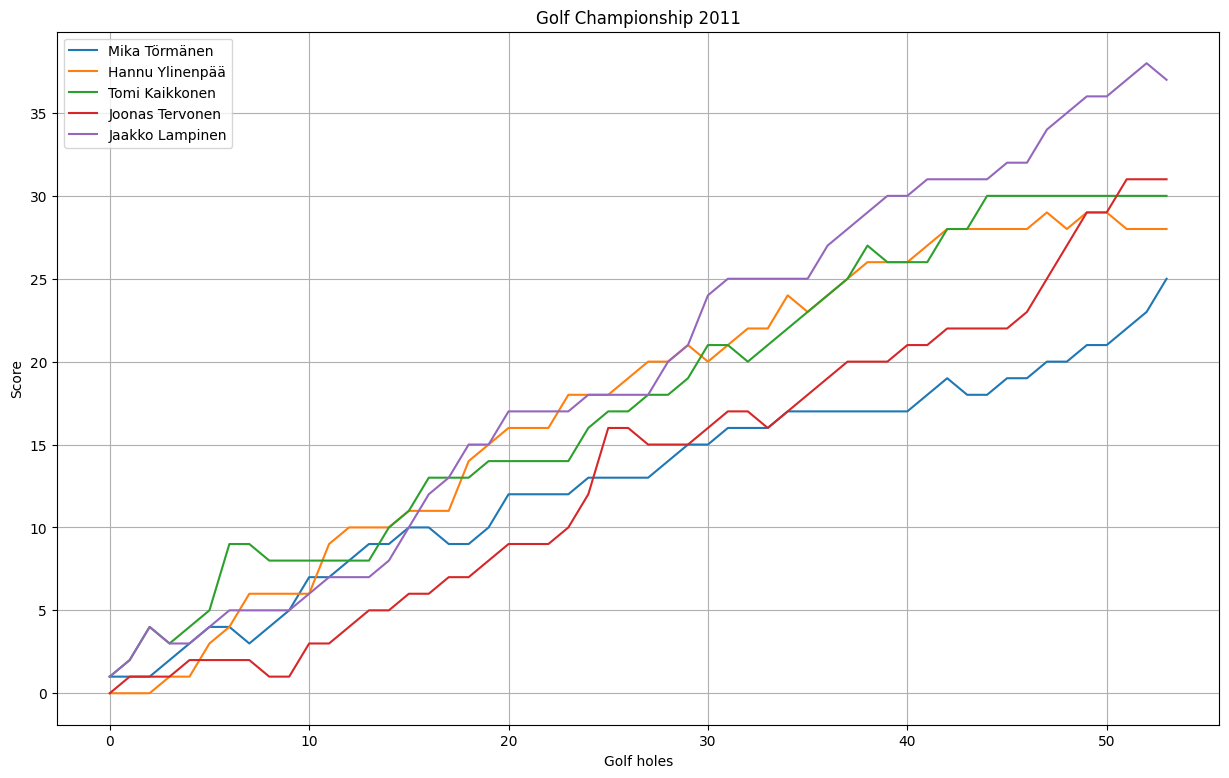

In [ ]:
# Let's visualize the 2011 scores using matplotlib and np.cumsum!

import matplotlib.pyplot as plt

cumsum_tormanen_2011 = np.cumsum(tormanen_2011 - course)
cumsum_ylinenpaa_2011 = np.cumsum(ylinenpaa_2011 - course)
cumsum_kaikkonen_2011 = np.cumsum(kaikkonen_2011 - course)
cumsum_tervonen_2011 = np.cumsum(tervonen_2011 - course)
cumsum_lampinen_2011 = np.cumsum(lampinen_2011 - course)

# Plot the cumulative sum for each array
plt.figure(figsize=(15, 9))
plt.plot(cumsum_tormanen_2011, label='Mika Törmänen')
plt.plot(cumsum_ylinenpaa_2011, label='Hannu Ylinenpää')
plt.plot(cumsum_kaikkonen_2011, label='Tomi Kaikkonen')
plt.plot(cumsum_tervonen_2011, label='Joonas Tervonen')
plt.plot(cumsum_lampinen_2011, label='Jaakko Lampinen')

# Customize the plot
plt.title('Golf Championship 2011')
plt.xlabel('Golf holes')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Comparing Mr. Törmänen's performance for 2011-2023 to get enough data!

Importing all the top five scores subce 2011.

In [ ]:
# All rounds
tormanen_2011 = np.array([[6, 3,	4,	6,	6,	4,	4,	3,	4,  5,	6,	5,	5,	4,	4,	5,	4,	2],
                          [5,	4,	6,	5,	5,	3,	5,	4,	3,	4,	5,	6,	4,	4,	4,	4,	5,	3],
                          [5,	3,	4,	5,	5,	4,	5,	3,	3,	5,	4,	6,	4,	4,	4,	5,	5,	5]])

ylinenpaa_2011 = np.array([[5,	3,	4,	6,	5,	5,	5,	6,	3,	4,	4,	8,	5,	3,	4,	5,	4,	3],
                           [8,	4,	5,	5,	5,	5,	4,	4,	4,	5,	4,	6,	3,	4,	5,	4,	6,	2],
                           [6,	4,	5,	5,	5,	4,	5,	4,	3,	4,	4,	6,	3,	4,	4,	3,	4,	3]])

kaikkonen_2011 = np.array([[6,	4,	6,	4,	6,	4,	8,	4,	2,	4,	4,	5,	4,	3,	6,	5,	6,	3],
                           [5,	4,	4,	5,	5,	3,	6,	5,	3,	5,	4,	6,	6,	3,	3,	5,	5,	4],
                           [6,	4,	6,	4,	5,	3,	6,	4,	5,	4,	4,	5,	4,	3,	4,	4,	4,	3]])

tervonen_2011 = np.array([[5,	4,	4,	5,	6,	3,	4,	4,	2,	4,	6,	5,	5,	4,	4,	5,	4,	4],
                          [5,	4,	5,	5,	5,	4,	6,	8,	3,	3,	4,	5,	5,	4,	4,	3,	5,	4],
                          [6,	4,	4,	5,	6,	3,	5,	4,	3,	4,	5,	7,	6,	5,	4,	6,	4,	3]])

lampinen_2011 = np.array([[6,	4,	6,	4,	5,	4,	5,	4,	3,	4,	5,	6,	4,	3,	5,	6,	6,	4],
                          [7,	3,	6,	5,	5,	3,	5,	4,	3,	4,	6,	6,	7,	4,	4,	4,	4,	3],
                          [7,	4,	5,	6,	5,	4,	4,	4,	3,	5,	4,	7,	5,	4,	4,	5,	5,	2]])

tormanen_2012 = np.array([[5,	3,	4,	5,	5,	3,	5,	4,	4,	4,	5,	6,	4,	4,	4,	4,	4,	3],
                         [5,	3,	4,	4,	5,	3,	4,	4,	3,	4,	4,	5,	5,	4,	4,	4,	4,	4],
                         [5,	3,	5,	5,	6,	3,	6,	4,	3,	5,	5,	5,	6,	5,	3,	4,	5,	3]])

niemela_2012 = np.array([[5,	3,	5,	5,	5,	3,	5,	4,	3,	6,	6,	5,	3,	4,	4,	4,	4,	3],
                        [6,	4,	5,	6,	6,	3,	4,	4,	4,	5,	3,	5,	6,	3,	3,	6,	5,	4],
                        [5,	3,	4,	5,	5,	2,	4,	5,	4,	4,	4,	10,	7,	4,	5,	6,	4,	3]])

alenius_2012 = np.array([[6,	3,	5,	5,	5,	2,	4,	6,	2,	4,	4,	7,	6,	2,	4,	3,	5,	4],
                        [6,	3,	5,	6,	5,	3,	5,	5,	3,	3,	3,	4,	8,	5,	3,	5,	4,	4],
                        [6,	4,	3,	5,	5,	4,	4,	4,	4,	5,	7,	5,	4,	4,	4,	5,	5,	3]])

ylinenpaa_2012 = np.array([[8,	3,	4,	8,	5,	2,	5,	5,	3,	4,	5,	5,	5,	2,	4,	5,	4,	2],
                          [4,	4,	4,	4,	5,	3,	4,	4,	3,	4,	4,	6,	4,	3,	4,	4,	4,	4],
                          [5,	4,	4,	4,	5,	4,	4,	6,	3,	4,	5,	5,	5,	3,	4,	5,	4,	3]])

hirvisalo_2012 = np.array([[5,	3,	4,	5,	5,	3,	6,	6,	4,	4,	6,	6,	4,	4,	4,	5,	3,	3],
                          [7,	3,	4,	6,	5,	3,	4,	5,	2,	5,	4,	6,	4,	3,	4,	4,	4,	2],
                          [5,	5,	5,	4,	5,	4,	5,	4,	3,	5,	5,	8,	5,	3,	5,	6,	4,	4]])

tormanen_2013 = np.array([[6,	2,	4,	6,	4,	3,	6,	5,	3,	4,	3,	5,	4,	3,	5,	4,	4,	4],
                          [5,	4,	5,	4,	4,	4,	6,	4,	3,	4,	4,	6,	4,	5,	4,	4,	5,	3],
                          [6,	3,	4,	5,	5,	5,	4,	4,	3,	4,	3,	5,	5,	3,	4,	3,	4,	4]])

lempinen_2013 = np.array([[5,	3,	5,	5,	4,	4,	5,	5,	4,	4,	4,	5,	4,	3,	4,	6,	4,	3],
                          [5,	4,	5,	4,	7,	4,	6,	6,	4,	4,	5,	5,	4,	5,	7,	4,	5,	4],
                          [5,	3,	4,	5,	5,	5,	4,	4,	3,	4,	4,	4,	4,	4,	5,	4,	5,	3]])

ylinenpaa_2013 = np.array([[5,	3,	4,	5,	5,	4,	5,	4,	5,	3,	4,	7,	4,	3,	5,	4,	4,	4],
                           [5,	4,	4,	5,	5,	3,	5,	5,	3,	5,	4,	5,	4,	4,	6,	4,	5,	4],
                           [6,	3,	4,	6,	5,	3,	4,	4,	3,	5,	4,	5,	4,	3,	5,	5,	3,	3]])

alenius_2013 = np.array([[5,	3,	4,	4,	6,	4,	5,	4,	3,	4,	5,	5,	4,	3,	4,	5,	6,	4],
                         [5,	2,	4,	7,	4,	3,	5,	4,	3,	4,	5,	6,	5,	4,	4,	5,	5,	3],
                         [7,	3,	4,	4,	5,	4,	6,	5,	4,	4,	6,	5,	4,	4,	3,	4,	4,	5]])

kaikkonen_2013 = np.array([[5,	3,	4,	5,	5,	4,	6,	5,	4,	5,	5,	7,	4,	4,	6,	5,	5,	3],
                           [5,	4,	6,	4,	5,	5,	4,	3,	3,	4,	4,	6,	3,	4,	4,	4,	4,	4],
                           [6,	5,	4,	5,	6,	5,	6,	4,	3,	3,	5,	5,	4,	3,	4,	5,	4,	3]])

tormanen_2014 = np.array([[5,	3,	4,	5,	4,	4,	5,	3,	3,	3,	4,	6,	5,	3,	4,	4,	4,	4],
                          [5,	3,	4,	4,	6,	4,	5,	4,	3,	4,	5,	5,	4,	3,	4,	4,	4,	3],
                          [6,	4,	4,	5,	5,	2,	4,	4,	4,	4,	5,	6,	5,	3,	5,	4,	4,	4]])

ylinenpaa_2014 = np.array([[4,	3,	5,	5,	7,	4,	5,	4,	3,	4,	5,	9,	3,	3,	3,	4,	4,	5],
                           [6,	3,	4,	4,	6,	4,	5,	4,	4,	4,	3,	5,	4,	3,	7,	5,	4,	2],
                           [6,	4,	5,	5,	5,	4,	4,	5,	4,	5,	3,	6,	5,	2,	4,	4,	4,	2]])

hirvisalo_2014 = np.array([[5,	3,	4,	5,	5,	5,	5,	4,	3,	3,	4,	5,	6,	4,	5,	4,	4,	3	],
                           [5,	3,	4,	7,	5,	7,	4,	4,	3,	4,	4,	5,	4,	3,	4,	6,	4,	3,],
                           [6,	3,	5,	4,	5,	3,	6,	4,	3,	6,	5,	5,	5,	4,	4,	5,	3,	3]])

koukkula_2014 = np.array([[4,	3,	4,	5,	5,	5,	4,	5,	4,	4,	4,	5,	4,	5,	4,	4,	4,	3],
                          [5,	3,	5,	5,	7,	4,	5,	5,	4,	4,	5,	5,	3,	3,	5,	4,	5,	4],
                          [6,	3,	8,	6,	7,	3,	4,	4,	4,	6,	6,	6,	4,	3,	4,	6,	5,	3]])

vanhatapio_2014 = np.array([[5,	3,	4,	4,	5,	4,	5,	6,	4,	5,	5,	6,	5,	3,	5,	4,	5,	4],
                            [6,	3,	4,	6,	6,	3,	4,	4,	3,	8,	5,	5,	3,	3,	4,	5,	4,	3],
                            [5,	3,	5,	5,	5,	3,	5,	4,	5,	5,	5,	6,	7,	5,	6,	4,	5,	3]])

tormanen_2015 = np.array([[5,	4,	5,	5,	5,	3,	6,	4,	4,	4,	4,	5,	5,	4,	4,	4,	4,	4],
                          [5,	3,	5,	5,	6,	3,	5,	4,	4,	4,	4,	5,	5,	4,	4,	5,	4,	3],
                          [5,	3,	4,	5,	5,	3,	4,	4,	3,	4,	3,	5,	5,	4,	5,	5,	4,	4]])

ylinenpaa_2015 = np.array([[5,	5,	5,	5,	6,	3,	4,	4,	4,	3,	6,	5,	5,	4,	7,	4,	4,	2],
                           [5,	3,	5,	5,	5,	3,	7,	4,	3,	5,	5,	8,	3,	4,	4,	5,	5,	3],
                           [4,	4,	5,	4,	5,	3,	5,	5,	4,	4,	4,	6,	5,	2,	3,	4,	4,	5]])

alenius_2015 = np.array([[5,	5,	5,	4,	7,	4,	5,	4,	3,	5,	6,	6,	5,	5,	4,	4,	3,	3,],
                         [6,	3,	4,	6,	5,	3,	5,	3,	3,	6,	5,	5,	4,	4,	5,	4,	5,	4],
                         [5,	3,	5,	5,	5,	3,	5,	5,	3,  4,	4,	4,	5,	4,	4,	5,	5,	4]])

hirvisalo_2015 = np.array([[6,	4,	4,	6,	7,	4,	4,	5,	3,	4,	4,	5,	6,	3,	6,	3,	4,	3],
                           [5,	4,	5,	8,	5,	3,	7,	5,	3,	3,	3,	5,	4,	4,	4,	4,	4,	4],
                           [4,	4,	4,	5,	6,	6,	5,	4,	4,	6,	5,	5,	6,	3,	4,	5,	4,	3]])

koukkula_2015 = np.array([[7,	3,	4,	6,	5,	4,	6,	4,	4,	4,	5,	5,	5,	3,	4,	3,	5,	5],
                          [6,	3,	4,	5,	5,	4,	8,	4,	4,	5,	5,	6,	4,	3,	4,	5,	4,	3],
                          [5,	3,	5,	4,	5,	4,	7,	5,	4,	4,	4,	6,	5,	3,	4,	6,	4,	4]])

tormanen_2016 = np.array([[5,	3,	4,	5,	5,	3,	5,	4,	3,	4,	4,	5,	4,	3,	4,	4,	5,	3],
                          [4,	3,	6,	5,	7,	4,	4,	5,	3,	5,	4,	5,	5,	4,	4,	6,	4,	4],
                          [5,	4,	4,	6,	4,	3,	5,	5,	3,	3,	4,	5,	3,	4,	4,	4,	4,	3]])

ylinenpaa_2016 = np.array([[6,	3,	4,	5,	4,	3,	5,	4,	4,	4,	4,	6,	5,	4,	8,	4,	4,	4],
                           [5,	3,	4,	5,	5,	3,	4,	4,	3,	4,	5,	5,	5,	3,	4,	4,	4,	3],
                           [5,	4,	4,	3,	5,	3,	5,	5,	3,	4,	4,	6,	4,	2,	4,	4,	5,	4]])

vanhatapio_2016 = np.array([[5,	4,	5,	5,	5,	4,	4,	6,	3,	3,	4,	5,	3,	3,	5,	4,	5,	3],
                            [6,	3,	4,	4,	6,	3,	5,	4,	3,	4,	4,	6,	6,	4,	4,	5,	6,	3],
                            [6,	3,	4,	4,	6,	4,	5,	4,	4,	4,	6,	6,	4,	4,	5,	4,	4,	3]])

tuuliainen_2016 = np.array([[5,	4,	4,	5,	5,	3,	5,	5,	3,	5,	4,	6,	4,	4,	5,	4,	3,	5],
                            [5,	3,	5,	5,	7,	3,	5,	3,	4,  4,	5,	7,	8,	3,	4,	5,	4,	3],
                            [9,	2,	5,	4,	5,	3,	5,	5,	4,	4,	4,	6,	5,	3,	6,	5,	5,	3]])

koukkula_2016 = np.array([[9,	3,	4,	5,	5,	3,	4,	3,	3,	5,	4,	7,	4,	3,	5,	9,	4,	3],
                          [5,	3,	5,	5,	6,	3,	5,	4,	3,	5,	4,	7,	6,	4,	5,	4,	5,	6],
                          [5,	4,	5,	7,	5,	5,	6,	5,	3,	5,	5,	5,	4,	5,	3,	3,	4,	3]])

tormanen_2017 = np.array([[4,	4,	4,	5,	5,	4,	4,	4,	3,	4,	4,	5,	6,	4,	4,	4,	4,	3],
                          [5,	3,	4,	5,	6,	3,	5,	5,	4,	4,	5,	5,	5,	3,	5,	4,	4,	3],
                          [5,	2,	5,	5,	5,	3,	4,	5,	4,	4,	6,	6,	4,	3,	3,	4,	4,	4]])

vanhatapio_2017 = np.array([[5,	4,	5,	5,	5,	3,	4,	5,	3,	5,	5,	5,	5,	3,	4,	5,	5,	4],
                            [6,	3,	4,	5,	5,	4,	6,	4,	3,	3,	3,	4,	4,	4,	5,	3,	5,	4],
                            [5,	3,	4,	5,	6,	4,	5,	4,	4,	6,	6,	6,	3,	4,	6,	4,	4,	3]])

ylinenpaa_2017 = np.array([[5,	3,	4,	5,	5,	4,	5,	4,	3,	6,	4,	5,	5,	4,	4,	3,	4,	3],
                           [5,	4,	4,	5,	4,	3,	5,	4,	3,	4,	5,	6,	4,	3,	5,	5,	4,	3],
                           [5,	4,	5,	6,	9,	3,	4,	4,	4,	4,	6,	8,	5,	4,	3,	4,	5,	3]])

koukkula_2017 = np.array([[5,	4,	6,	5,	5,	3,	5,	4,	5,	6,	4,	5,	4,	4,	4,	4,	4,	3],
                          [6,	3,	5,	6,	5,	3,	5,	5,	3,	4,	6,	6,	5,	3,	3,	3,	5,	2],
                          [7,	5,	6,	5,	5,	4,	6,	4,	4,	4,	4,	5,	4,	3,	5,	6,	5,	3]])

makinen_2017 = np.array([[6,	3,	4,	5,	6,	5,	5,	4,	2,	5,	7,	5,	3,	3,	6,	4,	4,	3],
                         [7,	4,	4,	4,	5,	4,	6,	5,	3,	5,	5,	6,	5,	3,	9,	5,	8,	4],
                         [5,	4,	5,	5,	6,	3,	4,	4,	4,	5,	4,	6,	5,	5,	5,	5,	5,	4]])

tormanen_2019 = np.array([[6,	3,	4,	5,	5,	4,	4,	4,	3,	4,	5,	5,	5,	3,	5,	4,	4,	3],
                          [5,	3,	4,	4,	5,	3,	4,	4,	4,	4,	4,	7,	5,	3,	5,	4,	4,	4],
                          [5,	4,	5,	5,	5,	3,	5,	4,	3,	3,	4,	6,	4,	3,	5,	5,	4,	4]])

ylinenpaa_2019 = np.array([[9,	4,	4,	5,	5,	3,	6,	4,	3,	4,	5,	5,	4,	3,	4,	4,	4,	3],
                           [5,	4,	4,	5,	5,	5,	4,	5,	4,	4,	4,	5,	4,	3,	5,	7,	3,	4],
                           [5,	4,	5,	4,	6,	4,	5,	4,	3,	3,	4,	6,	4,	4,	5,	4,	5,	4]])

alenius_2019 = ([[9,	3,	5,	8,	5,	4,	5,	4,	3,	4,	4,	6,	5,	3,	5,	4,	5,	4],
                 [5,	4,	5,	6,	5,	3,	3,	4,	3,	5,	5,	6,	3,	3,	6,	3,	4,	4],
                 [5,	3,	4,	6,	4,	4,	7,	4,	5,	4,	3,	6,	5,	3,	4,	5,	5,	4]])

vanhatapio_2019 = np.array([[4,	4,	4,	5,	5,	4,	5,	4,	3,	5,	4,	5,	5,	3,	6,	5,	4,	3],
                            [5,	4,	4,	5,	5,	3,	4,	6,	4,	4,	4,	7,	4,	3,	5,	6,	5,	4],
                            [6,	3,	4,	6,	6,	4,	5,	4,	3,	4,	5,	7,	5,	5,	4,	5,	5,	4]])

tuuliainen_2019 = np.array([[5,	3,	4,	4,	6,	3,	6,	5,	3,	4,	5,	7,	5,	5,	5,	4,	5,	6],
                            [6,	3,	5,	5,	7,	4,	4,	5,	3,	5,	4,	7,	5,	4,	7,	4,	3,	3],
                            [5,	4,	4,	6,	5,	4,	5,	4,	3,  4,	5,	5,	4,	3,	7,	4,	5,	4]])

tormanen_2020 = np.array([[5,	3,	4,	5,	5,	4,	4,	5,	4,	4,	4,	5,	3,	4,	3,	5,	4,	3],
                          [6,	3,	3,	5,	5,	3,	4,	4,	2,	4,	5,	6,	4,	3,	4,	5,	3,	6],
                          [6,	3,	5,	5,	4,	3,	5,	4,	3,	5,	5,	6,	5,	3,	4,	5,	5,	4]])

ylinenpaa_2020 = np.array([[5,	4,	4,	5,	5,	4,	6,	4,	3,	4,	3,	6,	4,	4,	4,	4,	4,	4],
                           [4,	4,	4,	5,	5,	3,	4,	5,	3,	6,	5,	5,	4,	2,	4,	5,	5,	4],
                           [5,	3,	4,	4,	5,	3,	4,	4,	3,	4,	6,	5,	4,	3,	4,	6,	4,	3]])

alenius_2020 = np.array([[6,	4,	4,	5,	6,	3,	5,	5,	2,	4,	4,	6,	6,	3,	8,	4,	4,	4],
                         [6,	3,	6,	4,	5,	3,	4,	4,	2,	4,	5,	4,	4,	2,	4,	4,	5,	3],
                         [5,	3,	4,	7,	4,	3,	4,	3,	3,	5,	4,	5,	5,	3,	4,	5,	5,	3]])

vazana_2020 = np.array([[5,	4,	4,	6,	4,	4,	6,	6,	3,	3,	4,	7,	5,	3,	4,	5,	4,	3],
                        [5,	3,	5,	5,	5,	3,	6,	4,	3,	5,	4,	5,	4,	3,	4,	4,	3,	4],
                        [5,	3,  4,	6,	6,	4,	5,	4,	3,	4,	3,	6,	7,	4,	3,	5,	4,	3]])

siliamaa_2020 = np.array([[6,	5,	4,	5,	5,	3,	6,	3,	3,	4,	4,	5,	4,	3,	4,	4,	6,	4],
                          [5,	3,	6,	5,	6,	4,	5,	4,	3,	4,	5,	6,	4,	3,	7,	4,	4,	4],
                          [5,	3,	4,	7,	6,	3,	4,	6,	3,	3,	3,	5,	4,	3,	4,	5,	4,	3]])

tormanen_2021 = np.array([[5,	3,	4,	4,	5,	3,	4,	4,	3,	4,	4,	7,	4,	3,	5,	5,	4,	3],
                          [5,	3,	3,	5,	5,	4,	5,	4,	3,	4,	4,	5,	5,	3,	4,	5,	4,	4],
                          [4,	2,	5,	5,	5,	3,	4,	4,	3,	4,	4,	5,	4,	4,	5,	5,	3,	4]])

vanhatapio_2021 = np.array([[6,	3,	4,	4,	5,	4,	5,	4,	2,	5,	4,	5,	3,	4,	4,	6,	4,	3],
                            [4,	4,	5,	6,	5,	3,	3,	5,	3,	4,	5,	5,	4,	3,	4,	4,	4,	3],
                            [5,	5,	4,	5,	6,	3,	5,	4,	4,	4,	4,	5,	5,	4,	4,	4,	4,	4]])

alenius_2021 = np.array([[7,	2,	4,	5,	5,	4,	5,	4,	3,	4,	5,	6,	5,	3,	4,	4,	3,	3],
                         [5,	3,	6,	5,	5,	3,	5,	4,	4,	4,	4,	6,	4,	4,	6,	5,	4,	4],
                         [6,	3,	4,	5,	6,	3,	5,	3,	4,	4,	4,	5,	4,	3,	4,	4,	4,	2]])

siliamaa_2021 = np.array([[6,	4,	5,	5,	5,	4,	4,	4,	2,	5,	4,	6,	3,	3,	4,	4,	3,	4],
                          [5,	4,	5,	5,	5,	4,	4,	5,	3,	4,	4,	7,	5,	3,	5,	5,	3,	3],
                          [5,	3,	4,	5,	7,	4,	7,	4,	3,	4,	4,	5,	4,	3,	4,	6,	4,	4]])

makinen_2021 = np.array([[6,	3,	5,	7,	6,	3,	5,	3,	3,	5,	4,	5,	4,	3,	4,	4,	3,	3],
                         [5,	3,	5,	5,	9,	4,	5,	4,	4,	5,	4,	5,	4,	3,	4,	3,	5,	3],
                         [6,	4,	6,	5,	5,	3,	5,	4,	3,	4,	4,	5,	4,	4,	7,	4,	5,	4]])

tormanen_2022 = np.array([[5,	3,	4,	4,	5,	3,	4,	4,	3,	4,	4,	5,	4,	3,	3,	6,	3,	4],
                          [4,	3,	4,	5,	4,	3,	4,	4,	3,	3,	4,	5,	4,	3,	4,	4,	4,	3],
                          [5,	4,	4,	5,	5,	3,	4,	4,	3,	4,	4,	5,	4,	4,	5,	5,	4,	3]])

siliamaa_2022 = np.array([[5,	3,	4,	4,	8,	3,	4,	4,	3,	4,	4,	6,	4,	3,	4,	4,	4,	3],
                          [6,	4,	4,	5,	5,	4,	5,	4,	2,	4,	5,	5,	4,	3,	5,	4,	4,	3],
                          [6,	3,	4,	5,	6,	3,	4,	3,	3,	4,	6,	5,	4,	3,	3,	6,	4,	3]])

makinen_2022 = np.array([[6,	4,	5,	5,	5,	3,	3,	3,	4,	3,	6,	4,	5,	2,	4,	3,	4,	3],
                         [5,	4,	5,	6,	5,	2,	5,	4,	3,	6,	6,	5,	4,	3,	4,	3,	4,	4],
                         [6,	4,	4,	7,	4,	3,	4,	5,	3,	3,	5,	6,	4,	4,	4,	4,	5,	3]])

vazana_2022 = np.array([[6,	3,	4,	5,	5,	3,	4,	4,	3,	4,	4,	6,	4,	3,	5,	4,	4,	5],
                        [4,	3,	4,	6,	5,	3,	4,	4,	3,	5,	4,	5,	4,	4,	5,	4,	4,	4],
                        [5,	4,	5,	5,	5,	5,	4,	5,	3,	5,	4,	6,	5,	4,	4,	4,	4,	5	]])

jaatinen_2022 = np.array([[5,	3,	5,	4,	7,	3,	5,	4,	3,	3,	3,	6,	5,	3,	4,	4,	5,	4],
                          [6,	3,	5,	5,	5,	3,	3,	6,	3,	4,	7,	5,	5,	3,	5,	4,	3,	3],
                          [5,	3,	6,	6,	5,	5,	5,	4,	3,	3,	7,	5,	4,	4,	5,	4,	4,	3]])

tormanen_2023 = np.array([[5,	4,	4,	5,	4,	5,	5,	4,	4,	4,	5,	5,	5,	4,	4,	5,	4,	3],
                          [5,	3,	4,	5,	4,	3,	6,	4,	3,	4,	5,	5,	4,	4,	5,	5,	5,	4],
                          [5,	3,	4,	5,	5,	3,	4,	4,	3,	4,	4,	6,	4,	3,	4,	4,	4,	4]])

siliamaa_2023 = np.array([[6,	3,	4,	5,	7,	3,	5,	5,	3,	4,	4,	7,	4,	3,	4,	4,	4,	5],
                          [4,	3,	4,	4,	5,	2,	4,	5,	3,	6,	4,	5,	4,	4,	4,	6,	4,	3],
                          [5,	3,	4,	6,	5,	3,	5,	4,	3,	4,	4,	7,	3,	4,	4,	4,	3,	3]])

ylinenpaa_2023 = np.array([[6,	4,	4,	4,	6,	4,	4,	3,	2,	4,	7,	7,	5,	3,	4,	4,	4,	4],
                           [4,	3,	5,	5,	4,	5,	5,	4,	4,	4,	7,	7,	5,	4,	3,	5,	4,	4],
                           [5,	3,	6,	5,	5,	3,	5,	4,	2,	5,	5,	4,	4,	2,	5,	4,	5,	3]])

niemi_2023 = np.array([[6,	4,	6,	5,	4,	7,	5,	5,	4,	4,	4,	6,	5,	4,	4,	4,	3,	3],
                       [6,	3,	4,	5,	5,	3,	5,	5,	4,	5,	5,	6,	4,	3,	5,	4,	4,	3],
                       [4,	3,	6,	4,	4,	4,	5,	5,	4,	4,	4,	7,	5,	3,	4,	4,	4,	4]])

kelha_2023 = np.array([[6,	3,	5,	5,	6,	3,	4,	6,	3,	4,	5,	6,	5,	3,	4,	5,	4,	4],
                       [5,	3,	4,	4,	6,	4,	5,	5,	2,	5,	4,	7,	4,	3,	5,	4,	5,	3],
                       [5,	3,	4,	6,	6,	4,	7,	4,	4,	4,	4,	7,	4,	3,	5,	4,	4,	3]])


# Let's calculate which holes are the most difficult


In [ ]:
# Combine all arrays except Mr. Tormanen's rounds
all_rounds = np.concatenate([ylinenpaa_2011, kaikkonen_2011, tervonen_2011, lampinen_2011, niemela_2012, alenius_2012, ylinenpaa_2012, hirvisalo_2012,  lempinen_2013, ylinenpaa_2013, alenius_2013, kaikkonen_2013, ylinenpaa_2014, hirvisalo_2014, koukkula_2014, vanhatapio_2014, ylinenpaa_2015, alenius_2015, hirvisalo_2015, koukkula_2015, ylinenpaa_2016, vanhatapio_2016, tuuliainen_2016, koukkula_2016, vanhatapio_2017, ylinenpaa_2017, koukkula_2017, makinen_2017,  ylinenpaa_2019, alenius_2019, vanhatapio_2019, tuuliainen_2019,  ylinenpaa_2020, alenius_2020, vazana_2020, siliamaa_2020,  vanhatapio_2021, alenius_2021, siliamaa_2021, makinen_2021, siliamaa_2022, makinen_2022, vazana_2022, jaatinen_2022, siliamaa_2023, ylinenpaa_2023, niemi_2023, kelha_2023])

print(all_rounds.shape)

# Calculate the average score relative to par
hole_avg = np.average(all_rounds - course, axis=0)

print(hole_avg)

# Get the indices that would sort the array
sorted_indices = np.argsort(hole_avg)



# Add 1 to the sorted indices to start from 1 instead of 0
sorted_indices = sorted_indices + 1

# Sort the array and keep track of the original indices
sorted_array = hole_avg[sorted_indices - 1]

# Display the sorted array and the corresponding indices
print("\nSorted Array:", sorted_array)
print("\nIndices of Sorted Array:", sorted_indices)



(144, 18)
[0.5        0.45138889 0.56944444 0.10416667 0.36805556 0.59027778
 0.89583333 0.38888889 0.26388889 0.33333333 0.5625     0.72222222
 0.49305556 0.41666667 0.54861111 0.47222222 0.31944444 0.45138889]

Sorted Array: [0.10416667 0.26388889 0.31944444 0.33333333 0.36805556 0.38888889
 0.41666667 0.45138889 0.45138889 0.47222222 0.49305556 0.5
 0.54861111 0.5625     0.56944444 0.59027778 0.72222222 0.89583333]

Indices of Sorted Array: [ 4  9 17 10  5  8 14 18  2 16 13  1 15 11  3  6 12  7]


Analyzing the results.
The easiest holes were:


1.   Hole #4 with +0.10
2.   Hole #9 with +0.26
3. Hole #17 with +0.32
4. Hole #10 with +0.33
5. Hole #5 with +0.37
6. Hole #8 with +0.39

The hardest holes were:


1.   Hole #7 with +0.9
2.   Hole #12 with +0.66
3. Hole #6 with +0.54
4. Hole #3 with +0.52
5. Hole #11 with +0.51
6. Hole #15 with +0.49





Next I need to calculate the hole averages for Mr. Törmänen

In [ ]:
# Combine all tormanen_rounds
tormanen_rounds = np.concatenate([tormanen_2011, tormanen_2012, tormanen_2013, tormanen_2014, tormanen_2015, tormanen_2016, tormanen_2017, tormanen_2019, tormanen_2020, tormanen_2021, tormanen_2022, tormanen_2023])

# Calculate the average score relative to par
tormanen_hole_avg = np.average(tormanen_rounds - course, axis=0)

print(tormanen_hole_avg)

# Get the indices that would sort the array
sorted_indices = np.argsort(tormanen_hole_avg)

# Add 1 to the sorted indices to start from 1 instead of 0
sorted_indices = sorted_indices + 1

# Sort the array and keep track of the original indices
sorted_array = tormanen_hole_avg[sorted_indices - 1]

# Display the sorted array and the corresponding indices
print("\nSorted Array:", sorted_array)
print("\nIndices of Sorted Array:", sorted_indices)



[ 0.08333333  0.16666667  0.27777778 -0.08333333 -0.02777778  0.36111111
  0.63888889  0.08333333  0.25        0.02777778  0.33333333  0.41666667
  0.47222222  0.55555556  0.19444444  0.47222222  0.11111111  0.58333333]

Sorted Array: [-0.08333333 -0.02777778  0.02777778  0.08333333  0.08333333  0.11111111
  0.16666667  0.19444444  0.25        0.27777778  0.33333333  0.36111111
  0.41666667  0.47222222  0.47222222  0.55555556  0.58333333  0.63888889]

Indices of Sorted Array: [ 4  5 10  1  8 17  2 15  9  3 11  6 12 13 16 14 18  7]


Next I want to count the amount of different scores by each hole.

In [ ]:
all_rounds_par = np.concatenate([all_rounds, tormanen_rounds])
all_rounds_par = np.subtract(all_rounds_par, course)

# Get the number of rows and columns in the array
num_rows, num_columns = all_rounds_par.shape

print(all_rounds_par.shape)

for col in range(num_columns):
    # Use np.unique to get unique values and their counts in the current column
    unique_values, counts = np.unique(all_rounds_par[:, col], return_counts=True)

    # Display the results for the current column
    print(f"Hole {col + 1}:")
    for value, count in zip(unique_values, counts):
        print(f"  Value {value}: {count} occurrences")
    print()

(180, 18)
Hole 1:
  Value -1: 16 occurrences
  Value 0: 97 occurrences
  Value 1: 53 occurrences
  Value 2: 8 occurrences
  Value 3: 2 occurrences
  Value 4: 4 occurrences

Hole 2:
  Value -1: 6 occurrences
  Value 0: 104 occurrences
  Value 1: 63 occurrences
  Value 2: 7 occurrences

Hole 3:
  Value -1: 3 occurrences
  Value 0: 102 occurrences
  Value 1: 57 occurrences
  Value 2: 17 occurrences
  Value 4: 1 occurrences

Hole 4:
  Value -2: 1 occurrences
  Value -1: 37 occurrences
  Value 0: 104 occurrences
  Value 1: 28 occurrences
  Value 2: 7 occurrences
  Value 3: 3 occurrences

Hole 5:
  Value -1: 19 occurrences
  Value 0: 110 occurrences
  Value 1: 36 occurrences
  Value 2: 12 occurrences
  Value 3: 1 occurrences
  Value 4: 2 occurrences

Hole 6:
  Value -1: 6 occurrences
  Value 0: 93 occurrences
  Value 1: 63 occurrences
  Value 2: 15 occurrences
  Value 3: 1 occurrences
  Value 4: 2 occurrences

Hole 7:
  Value -1: 4 occurrences
  Value 0: 63 occurrences
  Value 1: 80 occurren

In [ ]:
# Calculate the standard deviation for each column
std_devs = np.std(all_rounds_par, axis=0)

# Round the standard deviations to the first decimal place
std_devs_rounded = np.round(std_devs, decimals=1)

# Display the results
for col, std_dev in enumerate(std_devs_rounded):
    print(f"Hole {col + 1}: Standard Deviation = {std_dev}")

Hole 1: Standard Deviation = 0.9
Hole 2: Standard Deviation = 0.6
Hole 3: Standard Deviation = 0.7
Hole 4: Standard Deviation = 0.8
Hole 5: Standard Deviation = 0.8
Hole 6: Standard Deviation = 0.8
Hole 7: Standard Deviation = 0.9
Hole 8: Standard Deviation = 0.8
Hole 9: Standard Deviation = 0.6
Hole 10: Standard Deviation = 0.8
Hole 11: Standard Deviation = 0.9
Hole 12: Standard Deviation = 0.9
Hole 13: Standard Deviation = 0.9
Hole 14: Standard Deviation = 0.7
Hole 15: Standard Deviation = 1.0
Hole 16: Standard Deviation = 0.9
Hole 17: Standard Deviation = 0.7
Hole 18: Standard Deviation = 0.7


Next I need to visualize where the difference is based on the amount of strokes.

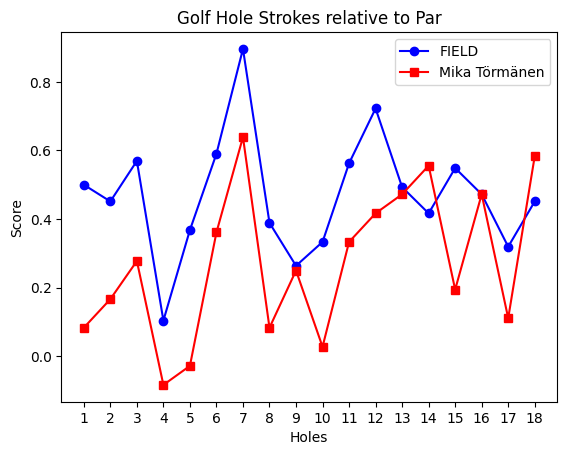

In [ ]:
# Create arrays of indices for x-axis with 18 points starting from index 1
x1 = np.arange(1, len(hole_avg) + 1)
x2 = np.arange(1, len(tormanen_hole_avg) + 1)

# Plot both arrays
plt.plot(x1, hole_avg, marker='o', linestyle='-', color='b', label='Competitors')
plt.plot(x2, tormanen_hole_avg, marker='s', linestyle='-', color='r', label='Mika Törmänen')

# Add labels and title
plt.xlabel('Holes')
plt.ylabel('Score')
plt.title('Golf Hole Strokes relative to Par')

# Set x-axis ticks and labels
plt.xticks(np.arange(1, len(hole_avg) + 1, 1))

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Conclusion
It was interesting to analyze Mr. Törmänen scores compared to his closest competitors. It's clear that Törmänen dominates the field on the first nine holes and that is where the difference is being made.